In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()


0

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


*Exploration Summary
* we have a dataframe consisting of 9827 rows and 9 columns.
* our dataset looks a bit tidy with no NaNs nor duplicated values.
* Release_date column need to be casted into a date time and to extract only the year value.
* Overview, Original_Language and Poster_Url wouldn't be so useful during analysis, so we'll drop them.
* there is a noticable outliers in Popularity column.
* Vote_average better be categorized for proper analysis.
* Genre column has coma separated values and white spaces that needs to be handled and casted into category

### Release_Date datatype change

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [11]:
df['Release_Date'].head()

0   2021-12-15
1   2022-03-01
2   2022-02-25
3   2021-11-24
4   2021-12-22
Name: Release_Date, dtype: datetime64[ns]

In [12]:
df['Release_Date'] = df['Release_Date'].dt.year

In [13]:
df['Release_Date'].dtype

dtype('int32')

In [14]:
df['Release_Date'].head()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32

### Dropping the columns

In [15]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace = True)

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### categorizing Vote_Average column
we would cut the Vote_Average values and make 4 categories popular, average, below_avg, not_popular to describe it more using catgorize_col() function provided below.

In [17]:
def categorise_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [18]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorise_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [19]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [25]:
popular = (df['Vote_Average'] == 'popular')
popular.sum()

2450

In [26]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [29]:
df.isna().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

### removing the NA values

In [30]:
df['Vote_Average'].dropna(inplace = True)

In [31]:
df['Vote_Average'].isna().sum()

100

In [32]:
df.dropna(inplace = True)

In [33]:
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

### Each genre in different line

In [34]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


### casting Genre column into category

In [38]:
df['Genre'].astype('category')
df['Genre'].dtypes

dtype('O')

In [37]:
df['Genre'].dtypes


dtype('O')

In [39]:
df.dtypes

Release_Date       int32
Title             object
Popularity       float64
Vote_Count         int64
Vote_Average    category
Genre             object
dtype: object

In [40]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [41]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


### Q.1 What is the most frequent genre of movies released on Netflix?

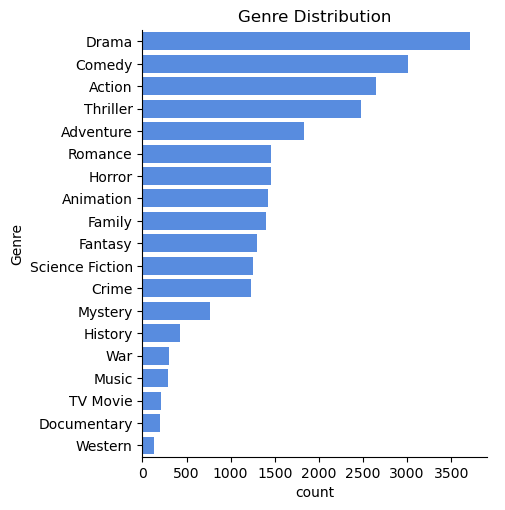

In [45]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('Genre Distribution')
plt.show()


### Q.2 which has highest votes in vote avg column

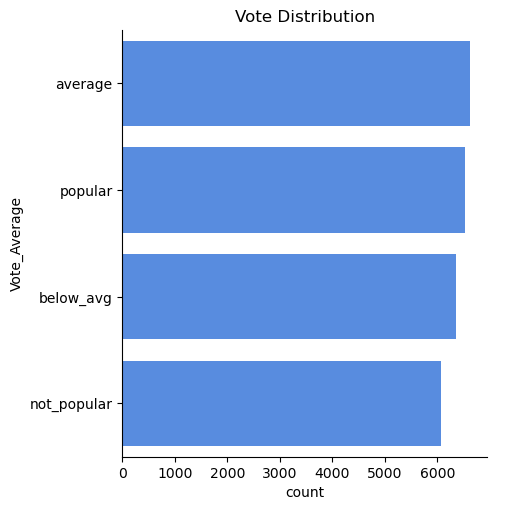

In [47]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = '#4287f5')
plt.title('Vote Distribution')
plt.show()

### Q.3 What movie got the highest popularity? what's its genre?

In [52]:
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Q.3 what movies got the lowest popularity? what's its Genre

In [53]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


## Q.4 Which year has the most filmed movies?

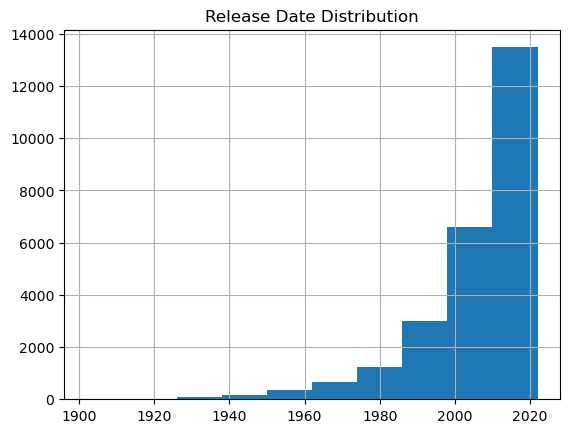

In [57]:
df['Release_Date'].hist()
plt.title("Release Date Distribution")
plt.show()


In [59]:
df['Release_Date'].value_counts().head(1)

Release_Date
2021    1636
Name: count, dtype: int64

CONCLUSION


Q.1 What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other Genres.

Q.2 which has highest votes in vote avg column?
the dataset has highest number of average voted movies, followed by popular, below average and not popular.

Q.3 What movie got the highest popularity? what's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has belongs to Genres like Action, Adventure and Science fiction.

Q.3 What movie got the lowest popularity? What's its genre?
The United States, Threads has the lowest rate in our dataset and it has genres like Music, Drama, War, Sci-fi and History.

Q.4 Which year has the most filmed movies?
Year 2021 has the highest filmed movies in our dataset.